c:\Users\Admin\Documents\Python\TensorFlow\Keras\PetImages


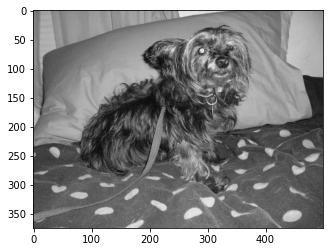

(375, 500)


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


CATEGORIES = ['Dog', 'Cat']
DATADIR = os.getcwd() + '\PetImages'
print(DATADIR)

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        # full path to image (os.path.join(path,img))
        # converts to array (cv2.imread)
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        print(os.path.join(path,img))
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break
# returns the size of the image
print(img_array.shape)

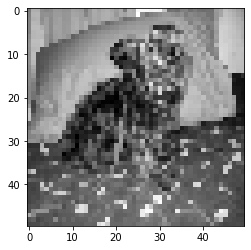

In [37]:
# setting a variable to eventually make image to a 50x50
IMG_SIZE = 50

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')


In [38]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        # makes class_num equal 1 or 0 wether its a dog or cat
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                # full path to image (os.path.join(path,img))
                # converts to array (cv2.imread)
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                # resized image
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                # adds the img to the array with the number representing wether its a dog or cat, 1 or 0 based on the index of categories
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()
print(len(training_data))

24946


In [40]:
import random
# need to shuffle because right not training_data is ordered by categories since it was appended that was in create_training_data
# this prevents the neural network from first learning all about dogs, then switching to cats and now only learning about cats
# gives it a bias learning method
random.shuffle(training_data)

for sample in training_data[:10]:
    # this prints the category number of what each item is in training_data
    print(sample[1])

1
0
1
1
0
0
1
0
1
0


In [60]:
# capital X is featured set
X = []
# lowercase y is labels
y = []

In [61]:
for features, label in training_data:
    X.append(features)
    y.append(label)

# x has to be a numpy array 
# 1st param is how many features we have (-1) means any amount
# 2nd/3rd param is size of img
# 4th 1 because it is a grey scaled
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [72]:
# saving / loading dataset
# saving features
np.save('Pet_features.npy', X)
# loading features
X = np.load('Pet_features.npy')

# saving labels
np.save('Pet_labels.npy', y)
# loading labels
y = np.load('Pet_labels.npy')

print(X[1])
print(y[1])

[[[ 58]
  [ 56]
  [ 53]
  ...
  [ 32]
  [ 36]
  [ 32]]

 [[ 53]
  [ 32]
  [ 50]
  ...
  [ 35]
  [ 32]
  [ 37]]

 [[ 18]
  [ 24]
  [ 26]
  ...
  [ 37]
  [ 32]
  [ 36]]

 ...

 [[144]
  [148]
  [143]
  ...
  [222]
  [200]
  [181]]

 [[129]
  [131]
  [142]
  ...
  [213]
  [210]
  [196]]

 [[138]
  [150]
  [143]
  ...
  [215]
  [200]
  [183]]]
0
